## Loading Data from yfinance

In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
raw = yf.download("SPY AAPL", start="2010-01-01", end="2019-12-31")
raw#.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2009-12-31   6.405579   86.648361   7.526071  111.440002   7.619643   
2010-01-04   6.505280   88.117905   7.643214  113.330002   7.660714   
2010-01-05   6.516527   88.351166   7.656429  113.629997   7.699643   
2010-01-06   6.412874   88.413376   7.534643  113.709999   7.686786   
2010-01-07   6.401017   88.786591   7.520714  114.190002   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  69.451057  305.051178  71.000000  321.220001  71.062500   
2019-12-24  69.517090  305.060730  71.067497  321.230011  71.222504   
2019-12-26  70.896332  306.684570  72.477501  322.940002  72.495003   
2019-12-27  70.869431  306.608643  72.449997  322.859985  73.492500   
2019-12-30  71.290054  304.918213  72.879997  321.079987  73.172501   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2009-12-31  112.800003   7.520000  111.389999   7.611786  112.769997   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

               Volume             
                 AAPL        SPY  
Date                              
2009-12-31  352410800   90637900  
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2516 rows x 12 columns]

In [3]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [4]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

In [5]:
(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200


We define a function `fix_cols` that takes a DataFrame as an input. The function extracts the first level of the columns multi-index and assigns it as the new columns of the DataFrame. The function returns the modified DataFrame.
```python
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df
```
The code then applies this function to a DataFrame raw using the pipe method. Before applying the function, the code selects all rows starting from the second row and every other column of the DataFrame raw using the iloc method.
```python
(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
)
```

The`.iloc[1:,::2]` function is used to slice a data set in a Pandas DataFrame. The `.iloc` function is primarily used for integer indexing and can be used with a boolean array.

* The first argument `1:` specifies that all rows starting from row 1 (second row) should be included in the slice. 
* The second argument `::2` specifies that every other column should be included in the slice starting from the first column.

The `fix_cols` function is then applied to this sliced data set using the `.pipe()` method.

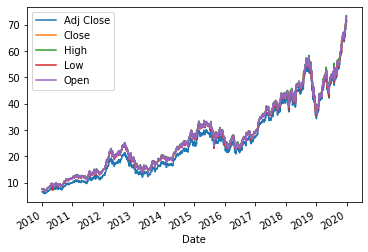

In [6]:
_=(raw
 .iloc[1:,:-2:2]
 .pipe(fix_cols)
 .plot()
)

The difference between these two codes is in the columns that they select from the DataFrame.

* `.iloc[1:,:-2:2]` selects all rows starting from the second row and every other column up to the third last column of the DataFrame. We are doing so inorder to get rid of the `volume` column before plotting.

## Line plotting with pandas and matplotlib

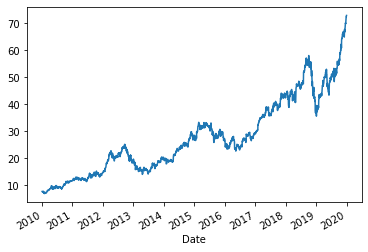

In [7]:
_=(raw
 .iloc[1:,:-2:2]
 .pipe(fix_cols)
 ['Close']
 .plot()
)

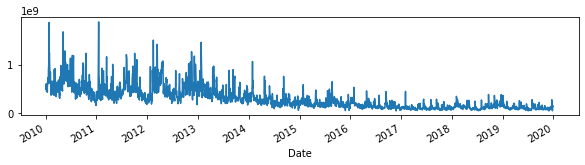

In [8]:
_=(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 ['Volume']
 .plot(figsize=(10,2))
)

## Resampling

In [9]:
(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 ['Close']
 )

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [10]:
(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 .resample('M')
 ['Close']
 .mean()
 # .plot()
 )

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

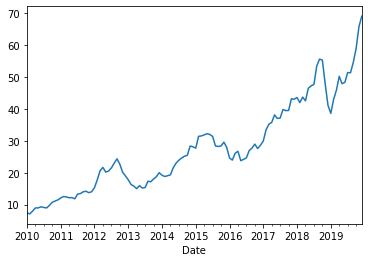

In [11]:
_=(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 .resample('M')
 ['Close']
 .mean()
 .plot()
 )

In [12]:
(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 .resample('Q')
 ['Close']
 .mean()
 # .plot()
 )

Date
2010-03-31     7.530539
2010-06-30     9.097818
2010-09-30     9.282327
2010-12-31    11.124810
2011-03-31    12.345829
2011-06-30    12.057585
2011-09-30    13.589654
2011-12-31    13.987806
2012-03-31    17.988566
2012-06-30    20.753220
2012-09-30    22.876553
2012-12-31    20.634424
2013-03-31    16.649083
2013-06-30    15.383677
2013-09-30    16.580195
2013-12-31    18.891892
2014-03-31    19.021593
2014-06-30    21.279382
2014-09-30    24.540859
2014-12-31    27.205313
2015-03-31    30.194262
2015-06-30    31.984524
2015-09-30    29.325859
2015-12-31    28.574844
2016-03-31    24.913770
2016-06-30    24.850313
2016-09-30    26.466523
2016-12-31    28.349762
2017-03-31    32.928145
2017-06-30    36.968849
2017-09-30    38.792262
2017-12-31    41.787064
2018-03-31    43.047828
2018-06-30    45.349141
2018-09-30    52.075000
2018-12-31    48.478016
2019-03-31    42.415943
2019-06-30    48.723175
2019-09-30    52.280195
2019-12-31    64.188055
Freq: Q-DEC, Name: Close, dtype: fl

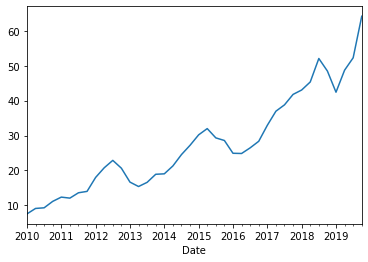

In [13]:
_=(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 .resample('Q')
 ['Close']
 .mean()
 .plot()
 )

## Candlestick plot from scratch with matlotlib

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


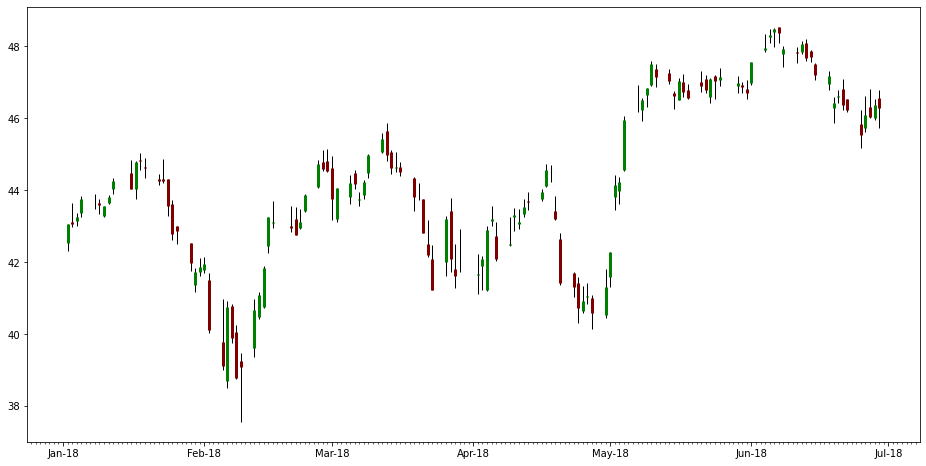

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))

def plot_candle(df, ax):
    
    # designing the wicks
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors="k", linewidth=1)
    
    # bearish candle design
    bear = df.query("Open > Close")
    ax.vlines(x=bear.index, ymin=bear.Close, ymax=bear.Open, colors="maroon", linewidth=3)
    
    # bullish candle design
    bull = df.query("Open < Close")
    ax.vlines(x=bull.index, ymin=bull.Open, ymax=bull.Close, colors="g", linewidth=3)
    
    # doji candle design
    doji = df.query("Open == Close")
    ax.vlines(x=doji.index, ymin=doji.Open, ymax=doji.Close, colors="k", linewidth=3)
    
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    
    return df
    


(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High':'max', 'Low': 'min', 'Close' : 'last'})
 .loc['jan 2018' : 'jun 2018']
 .pipe(plot_candle, ax)
)

,Open,High,Low,Close
Date,,,,
2019-09-01,51.465000,52.612499,50.830002,52.185001
2019-09-08,51.607498,53.605000,51.055000,53.314999
2019-09-15,53.709999,56.605000,52.767502,54.687500
2019-09-22,54.432499,55.939999,54.367500,54.432499
2019-09-29,54.737499,55.622501,54.285000,54.705002
2019-10-06,55.224998,57.055000,53.782501,56.752499
2019-10-13,56.567501,59.410000,56.082500,59.052502
2019-10-20,58.724998,59.532501,58.299999,59.102501
2019-10-27,59.380001,61.682499,59.330002,61.645000


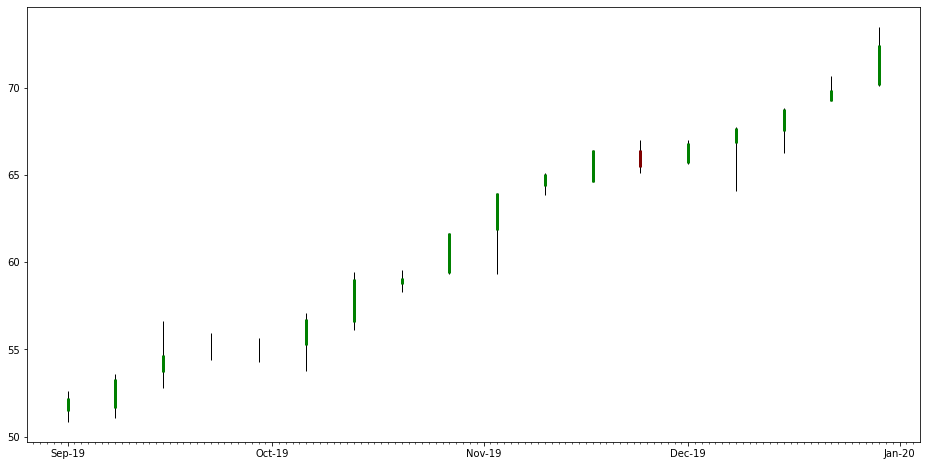

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
(raw
 .iloc[1:,::2]
 .pipe(fix_cols)
 .resample('w')
 .agg({'Open': 'first', 'High':'max', 'Low': 'min', 'Close' : 'last'})
 .loc['sep 2019' : 'dec 2019']
 .pipe(plot_candle, ax)
)

## Calculating stock returns

In [16]:
# Apple stocks
aapl = (raw
        .iloc[1:, ::2]
        .pipe(fix_cols)
       )
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200


In [17]:
# Apple returns
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23,0.016318,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864


## Plotting stock returns

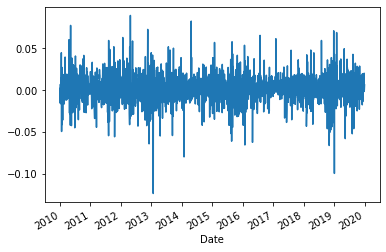

In [18]:
_=(aapl
 .pct_change()
 ['Close']
 .plot()
)

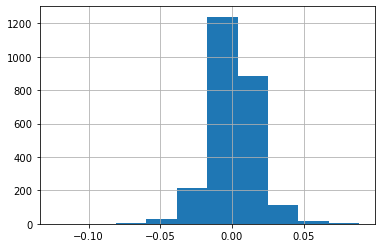

In [19]:
_=(aapl
 .pct_change()
 .Close
 .hist()
)

by default pandas creates 10 bins which are so wide. We will reduce the width of the bins by raising the number of bins

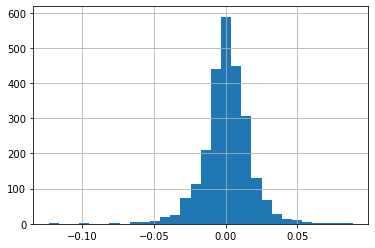

In [20]:
_=(aapl
 .pct_change()
 ['Close']
 .hist(bins=30)
)

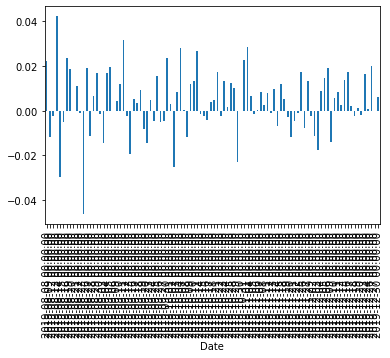

In [21]:
_=(aapl
 .pct_change()
 ['Close']
 .iloc[-100:]
 .plot.bar()
)

Plot bar plots with pandas converts whatever is in the x-axis into categorical data which can mess up the view a lil bit (with all the x-axis labels overlapping each other like we can see above)

Since pandas plots was built on matplotlib, it makes sense that we could also add some lines of code from maplotlib to fix the issue of overlapping labels.

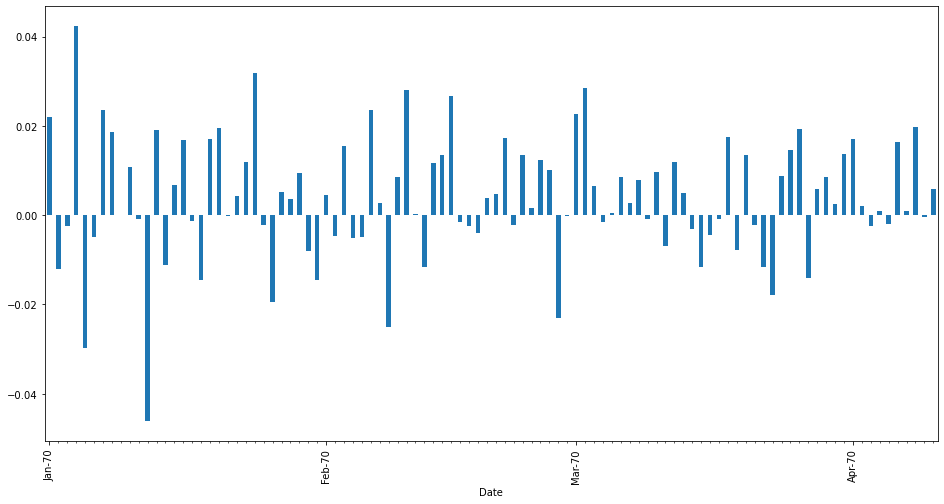

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))

(aapl
 .pct_change()
 ['Close']
 .iloc[-100:]
 .plot.bar(ax=ax)
)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

From the plot above, it looks like the issue of overlapping labels have been fixed, but a closer looks tells us a different story: the dates begin from January 1970 which was not part of the data we collected from _Yahoo Finance!_

One way to fix this is just to do the whole plot with matplotlib itself.

In [23]:
# Returns using matplotlib

def bar_plot(ser, ax):
    ax.bar(ser.index, ser)
    
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    
    return ser

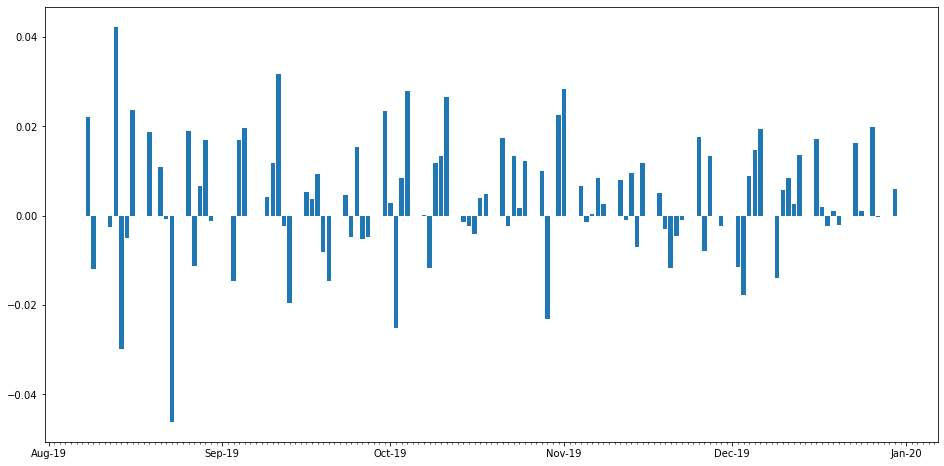

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

_= (aapl
    .pct_change()
    ['Close']
    .iloc[-100:]
    .pipe(bar_plot, ax)
)

The date displayed on the x-axis of the above looks like what we have been working with so far.

## Cumulative returns
This is the profits or losses of an investment over time:
$\frac{current\_price - original\_price}{original\_price}$

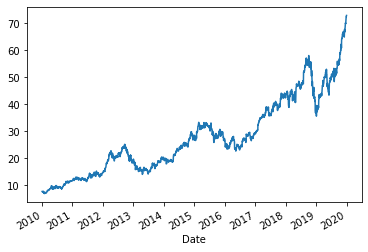

In [25]:
_=(aapl
 ['Close']
 .plot()
)

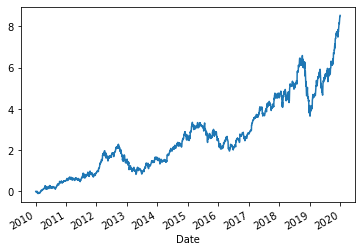

In [26]:
_=(aapl
 ['Close']
 .sub(aapl.Close[0])
 .div(aapl.Close[0])
 .plot()
)

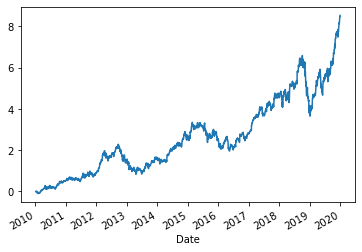

In [27]:
# Alternate calculation
_=(aapl
 ['Close']
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)

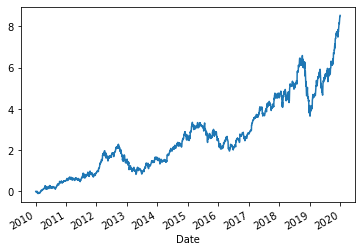

In [28]:
# create a function for calculating the cumulative returns
def calc_cumrets(df, col):
    ser = df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

_=(aapl
 .pipe(calc_cumrets, 'Close')
 .plot()
)

Let us repeat what we just did but this time using a _lamda_ or annonymous function.

In [29]:
def get_returns(df):
    return calc_cumrets(df, 'Close')

get_returns(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [30]:
(lambda x: get_returns(x))(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

As we can see we have the same results in each case. With the lambda function now we can create a new column on the dataframe we are working on.

In [31]:
(aapl
 .assign(cum_rets=lambda x: calc_cumrets(x, 'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,cum_rets
Date,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,8.289286
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,8.482594


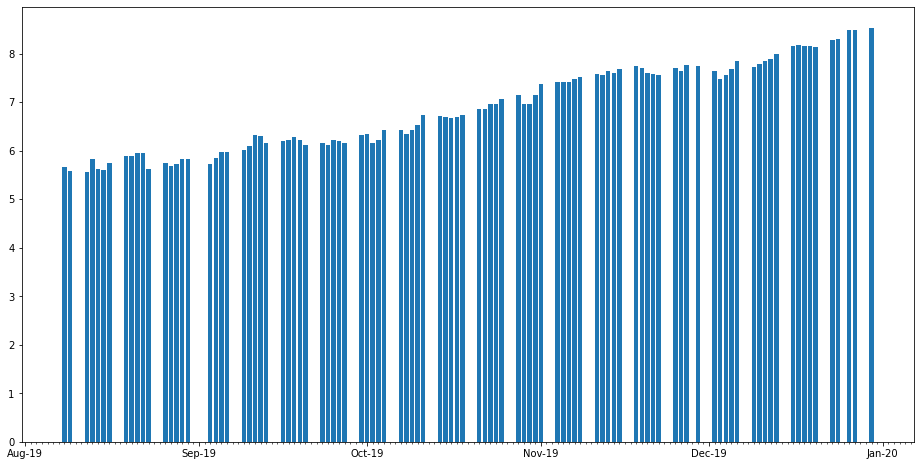

In [32]:
fig, ax = plt.subplots(figsize=(16, 8))

_= (aapl
    .pipe(calc_cumrets, 'Close')
    .iloc[-100:]
    .pipe(bar_plot, ax)
)

## Volatility

In [33]:
(aapl
 .Close
 .mean()
)

27.568102107796943

In [34]:
(aapl
 ['Close']
 .std()
)

14.016253049378737

In [35]:
(aapl
 .assign(pct_change_close=aapl['Close'].pct_change())
 .pct_change_close
 .std()
)

0.01623613318144792

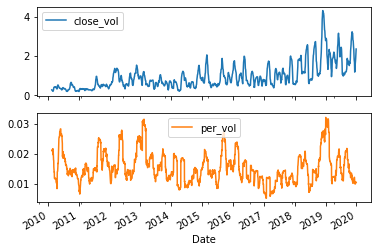

In [36]:
_=(aapl
 .assign(close_vol=aapl.rolling(30)['Close'].std(),
         per_vol=aapl['Close'].pct_change().rolling(30).std())
 .iloc[:, -2:]
 .plot(subplots=True)
)

In [37]:
# 15 day volatility
(aapl
 .assign(pct_change_close=aapl['Close'].pct_change())
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,0.078267,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383
2010-01-19,0.227369,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046
2010-02-03,0.113359,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088
2010-02-18,0.137291,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254
2010-03-05,0.074476,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002
...,...,...,...,...,...,...,...
2019-10-29,1.748355,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.013412
2019-11-13,0.516259,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.009868
2019-11-28,0.977058,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.012526


In [38]:
# 15 day rolling volatility
(aapl
 .assign(pct_change_close=aapl['Close'].pct_change())
 .rolling(window=15, min_periods=15)
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-23,1.847549,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.010997
2019-12-24,1.736155,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.009136
2019-12-26,1.757919,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.009786


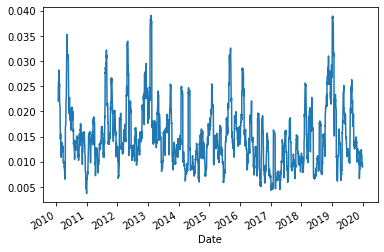

In [39]:
_=(aapl
 .assign(pct_change=aapl['Close'].pct_change())
 .rolling(window=15, min_periods=15)
 .std()
 ['pct_change']
 .plot()
)

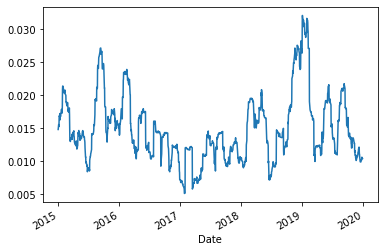

In [40]:
# plot the rolling volatility over 30-day sliding windows for 2015-2019
_=(aapl
 .assign(pct_change=aapl['Close']
        .pct_change())
 .rolling(window=30, min_periods=30)
 ['pct_change']
 .std()
 .loc['2015':'2019']
 .plot()
)

## Simple Moving average

In [41]:
(aapl
 .assign(s1=aapl['Close'].shift(),
         s2=aapl['Close'].shift(2),
        ma3=lambda x:x.loc[:,['Close', 's1', 's2']].mean(axis='columns'),
        ma3_builtin=aapl['Close'].rolling(3).mean())
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,7.643214,NaN
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,7.643214,NaN,7.649822,NaN
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,7.656429,7.643214,7.611429,7.611429
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,7.534643,7.656429,7.570595,7.570595
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,69.860001,70.004997,70.288333,70.288333
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,71.000000,69.860001,70.642499,70.642499
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,71.067497,71.000000,71.514999,71.514999


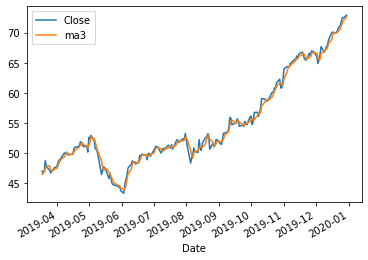

In [42]:
_=(aapl
 .assign(s1=aapl['Close'].shift(),
         s2=aapl['Close'].shift(2),
        ma3=lambda x:x.loc[:,['Close', 's1', 's2']].mean(axis='columns'),
        ma3_builtin=aapl['Close'].rolling(3).mean())
 [['Close', 'ma3']]
 .iloc[-200:]
 .plot()
)

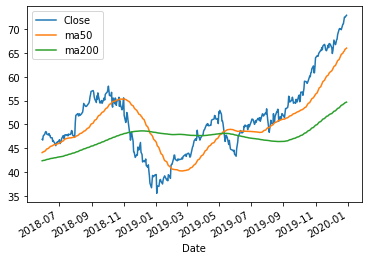

In [43]:
_=(aapl
 .assign(ma50=aapl['Close'].rolling(50).mean(),
        ma200=aapl['Close'].rolling(200).mean())
 [['Close', 'ma50', 'ma200']]
 .iloc[-400:]
 .plot()
)

## Exponential Moving Average

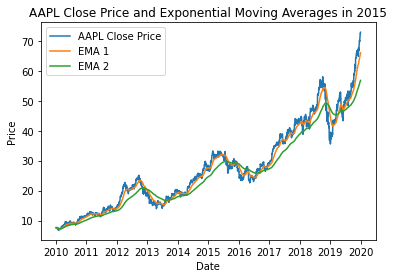

In [44]:
# Filter the data for the year 2015
# aapl_2015_df = aapl.loc[(aapl['Date'].dt.year == 2015)]

# Set the date column as the index
# aapl_2015_df = aapl_2015_df.set_index('Date')

# Calculate the exponential moving averages
ema_1 = aapl['Close'].ewm(alpha=0.0392).mean()
ema_2 = aapl['Close'].ewm(alpha=0.00995).mean()

# Create the plot
plt.plot(aapl['Close'], label='AAPL Close Price')
plt.plot(ema_1, label='EMA 1')
plt.plot(ema_2, label='EMA 2')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Close Price and Exponential Moving Averages in 2015')
plt.legend()

# Show the plot
plt.show()

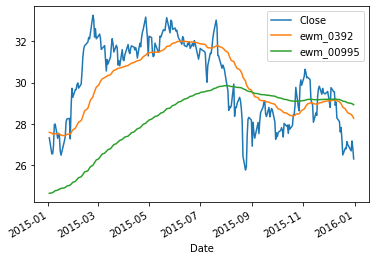

In [45]:
_=(aapl
 .assign(ewm_0392=aapl['Close'].ewm(alpha=0.0392).mean(),
        ewm_00995=aapl['Close'].ewm(alpha=0.00995).mean())
 [['Close', 'ewm_0392', 'ewm_00995']]
 .loc['2015']
 .plot()
)

## The On-Balance Volume (OBV)

$\text{OBV}=\text{OBV}_{prev} + \begin{cases}
                \text{volume}, & \quad \text{if } close > close_{prev}\\
                0, & \quad \text{if } close = close_{prev}\\
                \text{-volume}, & \quad \text{if } close < close_{prev}                
                \end{cases}         
                $
 

$$
\begin{document}
 \begin{align*}
 \textbf{where:}
 
 \text{OBV} = \text{Current on-balance colume level}\\
 
 \text{OBV}_{prev} = \text{Previous on-balance volume level}\\ 
 
 \text{volume} = \text{Latest trading volume amount} 
 \end{align*}
 \end{document}
 $$

In [46]:
aapl['Close']

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [47]:
aapl['Close'].shift()

Date
2010-01-04          NaN
2010-01-05     7.643214
2010-01-06     7.656429
2010-01-07     7.534643
2010-01-08     7.520714
                ...    
2019-12-23    69.860001
2019-12-24    71.000000
2019-12-26    71.067497
2019-12-27    72.477501
2019-12-30    72.449997
Name: Close, Length: 2515, dtype: float64

In [48]:
# Naive
def calc_obv(df):
    df = df.copy()
    df['obv'] = 0.0
    
    # loop thru the data amd calculate the OBV
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i - 1]:
            df['obv'][i] = df['obv'][i - 1] + df['Volume'][i]
            
        elif df['Close'][i] < df['Close'][i - 1]:
            df['obv'][i] = df['obv'][i - 1] - df['Volume'][i]
            
        else:
            df['obv'][i] = df['obv'][i - 1]
            
    return df

calc_obv(aapl)

C:\Users\ricky\AppData\Local\Temp\ipykernel_31276\718652261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obv'][i] = df['obv'][i - 1] + df['Volume'][i]
C:\Users\ricky\AppData\Local\Temp\ipykernel_31276\718652261.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obv'][i] = df['obv'][i - 1] - df['Volume'][i]
C:\Users\ricky\AppData\Local\Temp\ipykernel_31276\718652261.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

,Adj Close,Close,High,Low,Open,Volume,obv
Date,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,0.000000e+00
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,6.019048e+08
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,4.974480e+07
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,-4.273864e+08
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,2.022440e+07
...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,1.416509e+10
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,1.421357e+10
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,1.430669e+10


In [49]:
%%timeit
calc_obv(aapl)

C:\Users\ricky\AppData\Local\Temp\ipykernel_31276\718652261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obv'][i] = df['obv'][i - 1] + df['Volume'][i]
C:\Users\ricky\AppData\Local\Temp\ipykernel_31276\718652261.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obv'][i] = df['obv'][i - 1] - df['Volume'][i]
C:\Users\ricky\AppData\Local\Temp\ipykernel_31276\718652261.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

1.43 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit
(aapl
 .assign(close_prev=aapl['Close'].shift(1),
        vol=0,
        obv=lambda x: x.vol.where(cond=x.Close == x.close_prev,
                                 other=x.Volume.where(cond=x.Close > x.close_prev, 
                                                      other=x.Volume.where(cond=x.Close < x.close_prev, 
                                                      other=0)
                                                     )).cumsum()
        )
)

4.7 ms ± 594 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%%timeit
(aapl
 .assign(vol=np.select([aapl['Close'] > aapl['Close'].shift(),
                               aapl['Close'] == aapl['Close'].shift(),
                               aapl['Close'] < aapl['Close'].shift()],
                               [aapl['Volume'], 0, -aapl['Volume']]),
        obv=lambda x:x["vol"].cumsum())
)

2.48 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


```python
aapl.assign(vol=np.select(condlist=[aapl['Close'] > aapl['Close'].shift(),
                                    aapl['Close'] == aapl['Close'].shift(),
                                    aapl['Close'] < aapl['Close'].shift()],
                          choicelist=[aapl['Volume'], 0, -aapl['Volume']]),
            obv=lambda x:x["vol"].cumsum())
```

In [52]:
def calc_obv(df, close_col="Close", vol_col="Volume"):
    close = df[close_col]
    vol = df[vol_col]
    close_shift = close.shift(1)
    
    return (df
            .assign(vol=np.select(condlist=[close > close_shift,
                                    close == close_shift,
                                    close < close_shift],
                          choicelist=[vol, 0, -vol]),
            obv=lambda x:x.vol.fillna(0).cumsum())['obv']
      )

(aapl
 .assign(obv=calc_obv)
)

,Adj Close,Close,High,Low,Open,Volume,obv
Date,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,0
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,601904800
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,49744800
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,-427386400
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,20224400
...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,14165094000
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,14213572800
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,14306694000


## Accumulation/Distribution Indicator (A/D)
$$\text{MFM } = \frac{\text{(Close - Low) - (High - Close)}}{\text{High - Low}}$$


In [58]:
(aapl
 .assign(mfm=((aapl['Close'] - aapl['Low']) - (aapl['High'] - aapl['Close']))/(aapl['High'] - aapl['Low']),
         mfv=lambda x:x['mfm'] * x['Volume'],
         cmfv=lambda x:x['mfv'].cumsum()
        )
)

,Adj Close,Close,High,Low,Open,Volume,mfm,mfv,cmfv
Date,,,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,0.537737,2.654966e+08,2.654966e+08
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,-0.034183,-2.057486e+07,2.449217e+08
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,-0.901784,-4.979289e+08,-2.530072e+08
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,0.037280,1.778734e+07,-2.352198e+08
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,0.986385,4.415166e+08,2.062968e+08
...,...,...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,0.871134,8.586944e+07,2.265167e+10
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,0.370533,1.796298e+07,2.266963e+10
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,0.973482,9.065182e+07,2.276029e+10


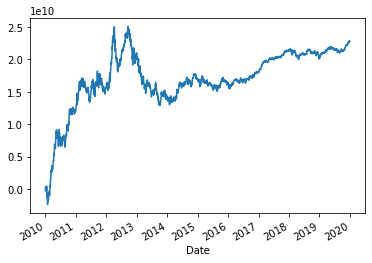

In [63]:
def calc_ad(df, close_col="Close", low_col="Low", 
           high_col="High", vol_col="Volume"):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
            .assign(mfm=((close - low) - (high - close))/(high - low),
             mfv=lambda x:x['mfm'] * x[vol_col],
             cmfv=lambda x:x['mfv'].cumsum())['cmfv']
           )

_=(aapl
 .assign(ad=calc_ad)
 ['ad']
 .plot()
)

## Relative Strength Index

https://school.stockcharts.com/doku.php?id=technical_indicators:relative_strength_index_rsi

In [65]:
import io

In [68]:
data = """	Date	QQQQ Close	Change	Gain	Loss 	Avg Gain	Avg Loss	RS	14-day RSI
1	14-Dec-09	44,34							
2	15-Dec-09	44,09	-0,25		0,25				
3	16-Dec-09	44,15	0,06	0,06					
4	17-Dec-09	43,61	-0,54		0,54				
5	18-Dec-09	44,33	0,72	0,72					
6	21-Dec-09	44,83	0,50	0,50					
7	22-Dec-09	45,10	0,27	0,27					
8	23-Dec-09	45,42	0,33	0,33					
9	24-Dec-09	45,84	0,42	0,42					
10	28-Dec-09	46,08	0,24	0,24					
11	29-Dec-09	45,89	-0,19		0,19				
12	30-Dec-09	46,03	0,14	0,14					
13	31-Dec-09	45,61	-0,42		0,42				
14	04-Jan-10	46,28	0,67	0,67				
15	05-Jan-10	46,28				0,24	0,10	2,39	70,53
16	06-Jan-10	46,00	-0,28		0,28	0,22	0,11	1,97	66,32
17	07-Jan-10	46,03	0,03	0,03		0,21	0,10	1,99	66,55
18	08-Jan-10	46,41	0,38	0,38		0,22	0,10	2,27	69,41
19	11-Jan-10	46,22	-0,19		0,19	0,20	0,10	1,97	66,36
20	12-Jan-10	45,64	-0,58		0,58	0,19	0,14	1,38	57,97
21	13-Jan-10	46,21	0,57	0,57		0,22	0,13	1,70	62,93
22	14-Jan-10	46,25	0,04	0,04		0,20	0,12	1,72	63,26
23	15-Jan-10	45,71	-0,54		0,54	0,19	0,15	1,28	56,06
24	19-Jan-10	46,45	0,74	0,74		0,23	0,14	1,66	62,38
25	20-Jan-10	45,78	-0,67		0,67	0,21	0,18	1,21	54,71
26	21-Jan-10	45,35	-0,43		0,43	0,20	0,19	1,02	50,42
27	22-Jan-10	44,03	-1,33		1,33	0,18	0,27	0,67	39,99
28	25-Jan-10	44,18	0,15	0,15		0,18	0,26	0,71	41,46
29	26-Jan-10	44,22	0,04	0,04		0,17	0,24	0,72	41,87
30	27-Jan-10	44,57	0,35	0,35		0,18	0,22	0,83	45,46
31	28-Jan-10	43,42	-1,15		1,15	0,17	0,29	0,59	37,30
32	29-Jan-10	42,66	-0,76		0,76	0,16	0,32	0,49	33,08
33	01-Feb-10	43,13	0,47	0,47		0,18	0,30	0,61	37,77

"""

In [81]:
qqq = (pd.read_table(io.StringIO(data), sep='\t')
       .assign(Date=lambda x:pd.to_datetime(x.Date),
              close=lambda x:x['QQQQ Close']
               .str.replace(',','.').astype(float))
       .iloc[:, 1:]
)
qqq

,Date,QQQQ Close,Change,Gain,Loss,Avg Gain,Avg Loss,RS,14-day RSI,close
0,2009-12-14,"44,34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.34
1,2009-12-15,"44,09","-0,25",NaN,"0,25",NaN,NaN,NaN,NaN,44.09
2,2009-12-16,"44,15","0,06","0,06",NaN,NaN,NaN,NaN,NaN,44.15
3,2009-12-17,"43,61","-0,54",NaN,"0,54",NaN,NaN,NaN,NaN,43.61
4,2009-12-18,"44,33","0,72","0,72",NaN,NaN,NaN,NaN,NaN,44.33
5,2009-12-21,"44,83","0,50","0,50",NaN,NaN,NaN,NaN,NaN,44.83
6,2009-12-22,"45,10","0,27","0,27",NaN,NaN,NaN,NaN,NaN,45.10
7,2009-12-23,"45,42","0,33","0,33",NaN,NaN,NaN,NaN,NaN,45.42
8,2009-12-24,"45,84","0,42","0,42",NaN,NaN,NaN,NaN,NaN,45.84
9,2009-12-28,"46,08","0,24","0,24",NaN,NaN,NaN,NaN,NaN,46.08


In [85]:
(qqq
 [['close']]
 .assign(change=lambda x:x['close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        )
)

,close,change,gain,loss
0,44.34,NaN,NaN,NaN
1,44.09,-0.25,0.00,0.25
2,44.15,0.06,0.06,-0.00
3,43.61,-0.54,0.00,0.54
4,44.33,0.72,0.72,-0.00
5,44.83,0.50,0.50,-0.00
6,45.10,0.27,0.27,-0.00
7,45.42,0.32,0.32,-0.00
8,45.84,0.42,0.42,-0.00
9,46.08,0.24,0.24,-0.00


In [94]:
def avg(df, col, window_size=14):
    results = []
    window = []
    for i, val in enumerate(df[col]):
        window.append(val)
        if i < (window_size):
            results.append(np.nan)
            
        elif i == (window_size):
            window.pop(0)
            results.append(sum(window)/window_size)
            
        else:
            results.append((results[-1] * (window_size - 1) + val)
                          / window_size)
            
    return pd.Series(results, index=df.index)

(qqq
 [['close']]
 .assign(change=lambda x:x['close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        avg_gain=lambda x:avg(x, col='gain'),
        avg_loss=lambda x:avg(x, col='loss'),
        rs=lambda x:x['avg_gain']/x['avg_loss'],
        rsi=lambda x:np.select(condlist=[x['avg_loss']==0],
                              choicelist=[100], default=(100-(100/(1+x['rs']))))
        )
)

,close,change,gain,loss,avg_gain,avg_loss,rs,rsi
0,44.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.09,-0.25,0.00,0.25,NaN,NaN,NaN,NaN
2,44.15,0.06,0.06,-0.00,NaN,NaN,NaN,NaN
3,43.61,-0.54,0.00,0.54,NaN,NaN,NaN,NaN
4,44.33,0.72,0.72,-0.00,NaN,NaN,NaN,NaN
5,44.83,0.50,0.50,-0.00,NaN,NaN,NaN,NaN
6,45.10,0.27,0.27,-0.00,NaN,NaN,NaN,NaN
7,45.42,0.32,0.32,-0.00,NaN,NaN,NaN,NaN
8,45.84,0.42,0.42,-0.00,NaN,NaN,NaN,NaN
9,46.08,0.24,0.24,-0.00,NaN,NaN,NaN,NaN


In [96]:
(aapl
 .assign(change=lambda x:x['Close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        avg_gain=lambda x:avg(x, col='gain'),
        avg_loss=lambda x:avg(x, col='loss'),
        rs=lambda x:x['avg_gain']/x['avg_loss'],
        rsi=lambda x:np.select(condlist=[x['avg_loss']==0],
                              choicelist=[100], default=(100-(100/(1+x['rs']))))
        )
)

,Adj Close,Close,High,Low,Open,Volume,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,0.013215,0.013215,-0.000000,NaN,NaN,NaN,NaN
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,-0.121786,0.000000,0.121786,NaN,NaN,NaN,NaN
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,-0.013929,0.000000,0.013929,NaN,NaN,NaN,NaN
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,0.050000,0.050000,-0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,1.139999,1.139999,-0.000000,0.431769,0.150064,2.877241,74.208465
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,0.067497,0.067497,-0.000000,0.405750,0.139345,2.911840,74.436585
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,1.410004,1.410004,-0.000000,0.477482,0.129392,3.690210,78.678994


We will make it faster

In [97]:
%%timeit
(aapl
 .assign(change=lambda x:x['Close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        avg_gain=lambda x:avg(x, col='gain'),
        avg_loss=lambda x:avg(x, col='loss'),
        rs=lambda x:x['avg_gain']/x['avg_loss'],
        rsi=lambda x:np.select(condlist=[x['avg_loss']==0],
                              choicelist=[100], default=(100-(100/(1+x['rs']))))
        )
)

11.5 ms ± 922 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Let us use numba

In [103]:
import numba as nb
@nb.jit(nb.float64[:](nb.float64[:], nb.int64))
def avg_nb(ser, window_size=14):
    results = np.empty(len(ser))
    window = []
    for i, val in enumerate(ser):
        window.append(val)
        if i < (window_size):
            results[i] = np.nan
            
        elif i == (window_size):
            window.pop(0)
            results[i] = sum(window)/window_size
            
        else:
            results[i] = ((results[-1] * (window_size - 1) + val)
                          / window_size)
            
    return results

In [104]:
%%timeit
(aapl
 .assign(change=lambda x:x['Close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        avg_gain=lambda x:avg_nb(x['gain'].to_numpy(), 14),
        avg_loss=lambda x:avg_nb(x['loss'].to_numpy(), 14),
        rs=lambda x:x['avg_gain']/x['avg_loss'],
        rsi=lambda x:np.select(condlist=[x['avg_loss']==0],
                              choicelist=[100], default=(100-(100/(1+x['rs']))))
        )
)

7.56 ms ± 990 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### From Bing GPT

Here's an example of how you can convert the `avg` function to use Numba for faster performance:

```python
from numba import njit
import numpy as np

@njit
def avg_numba(col, window_size=14):
    results = np.empty(col.shape)
    window = np.empty(window_size)
    for i, val in enumerate(col):
        window[i % window_size] = val
        if i < window_size:
            results[i] = np.nan
        else:
            results[i] = np.mean(window)
    return results

def avg(df, col, window_size=14):
    return pd.Series(avg_numba(df[col].values, window_size), index=df.index)
```

In this example, we've created a new function called `avg_numba` that takes a NumPy array (`col`) and an optional `window_size` argument as input. This function is decorated with the `@njit` decorator from the `numba` library, which tells Numba to compile the function using just-in-time (JIT) compilation for faster performance.

The `avg_numba` function uses a similar algorithm to the original `avg` function to calculate the moving average of the input column. However, it uses NumPy arrays and functions instead of Python lists and built-in functions to improve performance.

The original `avg` function has been modified to call the `avg_numba` function and pass it the values of the specified column in the input DataFrame (`df[col].values`). The result of the `avg_numba` function is then converted to a pandas Series and returned.


In [105]:
from numba import njit

@njit
def avg_numba(col, window_size=14):
    results = np.empty(col.shape)
    window = np.empty(window_size)
    for i, val in enumerate(col):
        window[i % window_size] = val
        if i < window_size:
            results[i] = np.nan
        else:
            results[i] = np.mean(window)
    return results

def avg(df, col, window_size=14):
    return pd.Series(avg_numba(df[col].values, window_size), index=df.index)

In [106]:
(aapl
 .assign(change=lambda x:x['Close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        avg_gain=lambda x:avg(x, col='gain'),
        avg_loss=lambda x:avg(x, col='loss'),
        rs=lambda x:x['avg_gain']/x['avg_loss'],
        rsi=lambda x:np.select(condlist=[x['avg_loss']==0],
                              choicelist=[100], default=(100-(100/(1+x['rs']))))
        )
)

,Adj Close,Close,High,Low,Open,Volume,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286,601904800,0.013215,0.013215,-0.000000,NaN,NaN,NaN,NaN
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429,552160000,-0.121786,0.000000,0.121786,NaN,NaN,NaN,NaN
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500,477131200,-0.013929,0.000000,0.013929,NaN,NaN,NaN,NaN
2010-01-08,6.443572,7.570714,7.571429,7.466429,7.510714,447610800,0.050000,0.050000,-0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500,98572000,1.139999,1.139999,-0.000000,0.528392,0.090000,5.871051,85.446185
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800,0.067497,0.067497,-0.000000,0.492321,0.090000,5.470257,84.544664
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,1.410004,1.410004,-0.000000,0.524464,0.090000,5.827405,85.353147


In [107]:
%%timeit
(aapl
 .assign(change=lambda x:x['Close'].diff(),
        gain=lambda x: x['change'].clip(lower=0),
        loss=lambda x: -x['change'].clip(upper=0),
        avg_gain=lambda x:avg(x, col='gain'),
        avg_loss=lambda x:avg(x, col='loss'),
        rs=lambda x:x['avg_gain']/x['avg_loss'],
        rsi=lambda x:np.select(condlist=[x['avg_loss']==0],
                              choicelist=[100], default=(100-(100/(1+x['rs']))))
        )
)

7.29 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
